In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.mixture import GaussianMixture
from collections import Counter
from src.utils_clustering import plot_clusters, evaluate_clustering, load_labels_from_file

In [3]:
# Load the processed data
DATASET_FILE_NAME = "s1"
dataset_file_path = rf'..\data\processed\{DATASET_FILE_NAME}.txt'
processed_data = pd.read_csv(dataset_file_path)

In [4]:
# Load the true labels (if available)
LABELS_FILE_NAME = 's1-label'
labels_file_path = rf'..\data\label\{LABELS_FILE_NAME}.pa'
labels_true = load_labels_from_file(labels_file_path, len(processed_data))

In [5]:
# Applying Gaussian Mixture Model
gmm = GaussianMixture(n_components=15, random_state=0)  # Adjust n_components as needed
labels_pred = gmm.fit_predict(processed_data)

In [6]:
# Displaying the cluster distribution
cluster_distribution = Counter(labels_pred)
print("Cluster Distribution for Gaussian Mixture Model:", cluster_distribution)

Cluster Distribution for Gaussian Mixture Model: Counter({7: 681, 3: 352, 4: 352, 5: 350, 8: 347, 0: 341, 1: 340, 13: 340, 2: 333, 11: 325, 10: 318, 12: 312, 9: 297, 14: 293, 6: 19})


In [7]:
# Set parameters for evaluation
clustering_name = 'Gaussian_Mixture_Model'
dataset_name = DATASET_FILE_NAME
results_path = r'../results/metrics/results.csv'

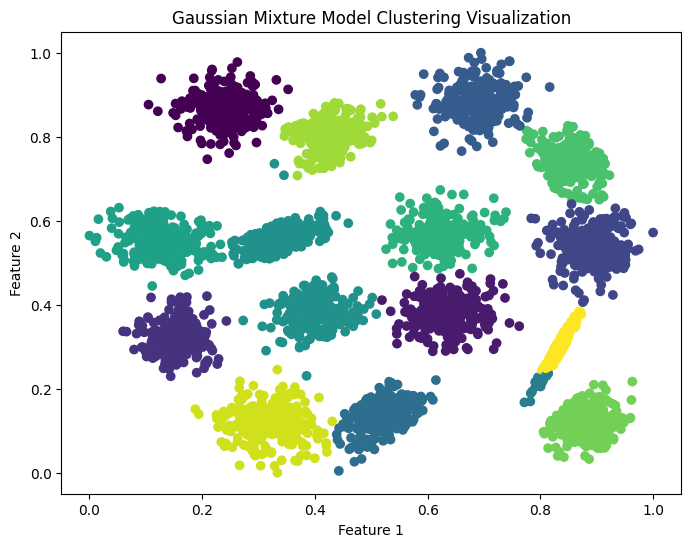

Timestamp: 2024-01-17 12:55:28.709059
Dataset: s1
Clustering Algorithm: Gaussian_Mixture_Model
AMI: 0.9669282639841419
ARI: 0.9151553531503446
Calinski-Harabasz Score: 14475.723176146508
Davies-Bouldin Score: 0.4313834758425031
Completeness Score: 0.9819431569626852
Fowlkes-Mallows Score: 0.922950515232927
Homogeneity: 0.9528472314416963
Completeness: 0.9819431569626852
V-Measure: 0.9671764178202641
Mutual Information: 2.5793288309250286
Normalized Mutual Information: 0.9671764178202642
Rand Score: 0.9887974394878976
Silhouette Score: 0.6597901913859175


In [8]:
# Plotting and evaluating the clustering
plot_clusters(processed_data, labels_pred, title='Gaussian Mixture Model Clustering Visualization')
evaluate_clustering(X=processed_data, labels_true=labels_true, labels_pred=labels_pred,
                    clustering_name=clustering_name, dataset_name=dataset_name, 
                    results_path=results_path)